# Forsite of Cardiovascualar Diseases (CVD)

Here we are evaluating different health metrics to come upwith a model that can accurately predict  the lieklihood of someone getting CVD

### Context
Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

### Attribute Information
Age: age of the patient [years]

Sex: sex of the patient [M: Male, F: Female]

ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

RestingBP: resting blood pressure [mm Hg]

Cholesterol: serum cholesterol [mm/dl]

FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]

ExerciseAngina: exercise-induced angina [Y: Yes, N: No]

Oldpeak: oldpeak = ST [Numeric value measured in depression]

ca:

ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

HeartDisease: output class [1: heart disease, 0: Normal]

### Source
This dataset was created by combining different datasets already available independently but not combined before. In this dataset, 5 heart datasets are combined over 11 common features which makes it the largest heart disease dataset available so far for research purposes. The five datasets used for its curation are:



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, GradientBoostingClassifier
# Set the maximum column width
pd.set_option('display.max_colwidth', 100)
# Magic function to display plots in notebook
%matplotlib inline

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [3]:
df =  pd.read_csv(r"C:\Users\jdgoe\OneDrive\Uni - Official\Data Mining\Cardio Vascular Disease.csv", low_memory=False)

In [4]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
df['ST_Slope'].value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [8]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [9]:
# for column in df[['Age', 'RestingBP', 'Cholesterol', 'FastingBS',
#        'MaxHR', 'ST_Slope']]:
#     plt.figure()
#     plt.boxplot(df[column])
#     plt.title(f'Boxplot of {column}')
#     plt.ylabel('Value')
#     plt.show()

In [10]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [11]:
df['FastingBS'].value_counts()

0    704
1    214
Name: FastingBS, dtype: int64

- The average age of the patients in the dataset is 54 years old. Minimum 'cholesterol' being 0 likely means there is some data that is not available even though there are non 'nans' shown.

- The median for Cholesterol is higher than its mean by roughly 25 mm/dl, indicating that it could be a left-skewed distribution with a possibility of outliers skewing the distribution.


We'll create a bar chart for each categorical column in the heart_df dataset, including FastingBS and HeartDisease. These charts will display the number of rows for each category in the column, with appropriate axis labels, data labels, and a title to make the visualization clear and informative.

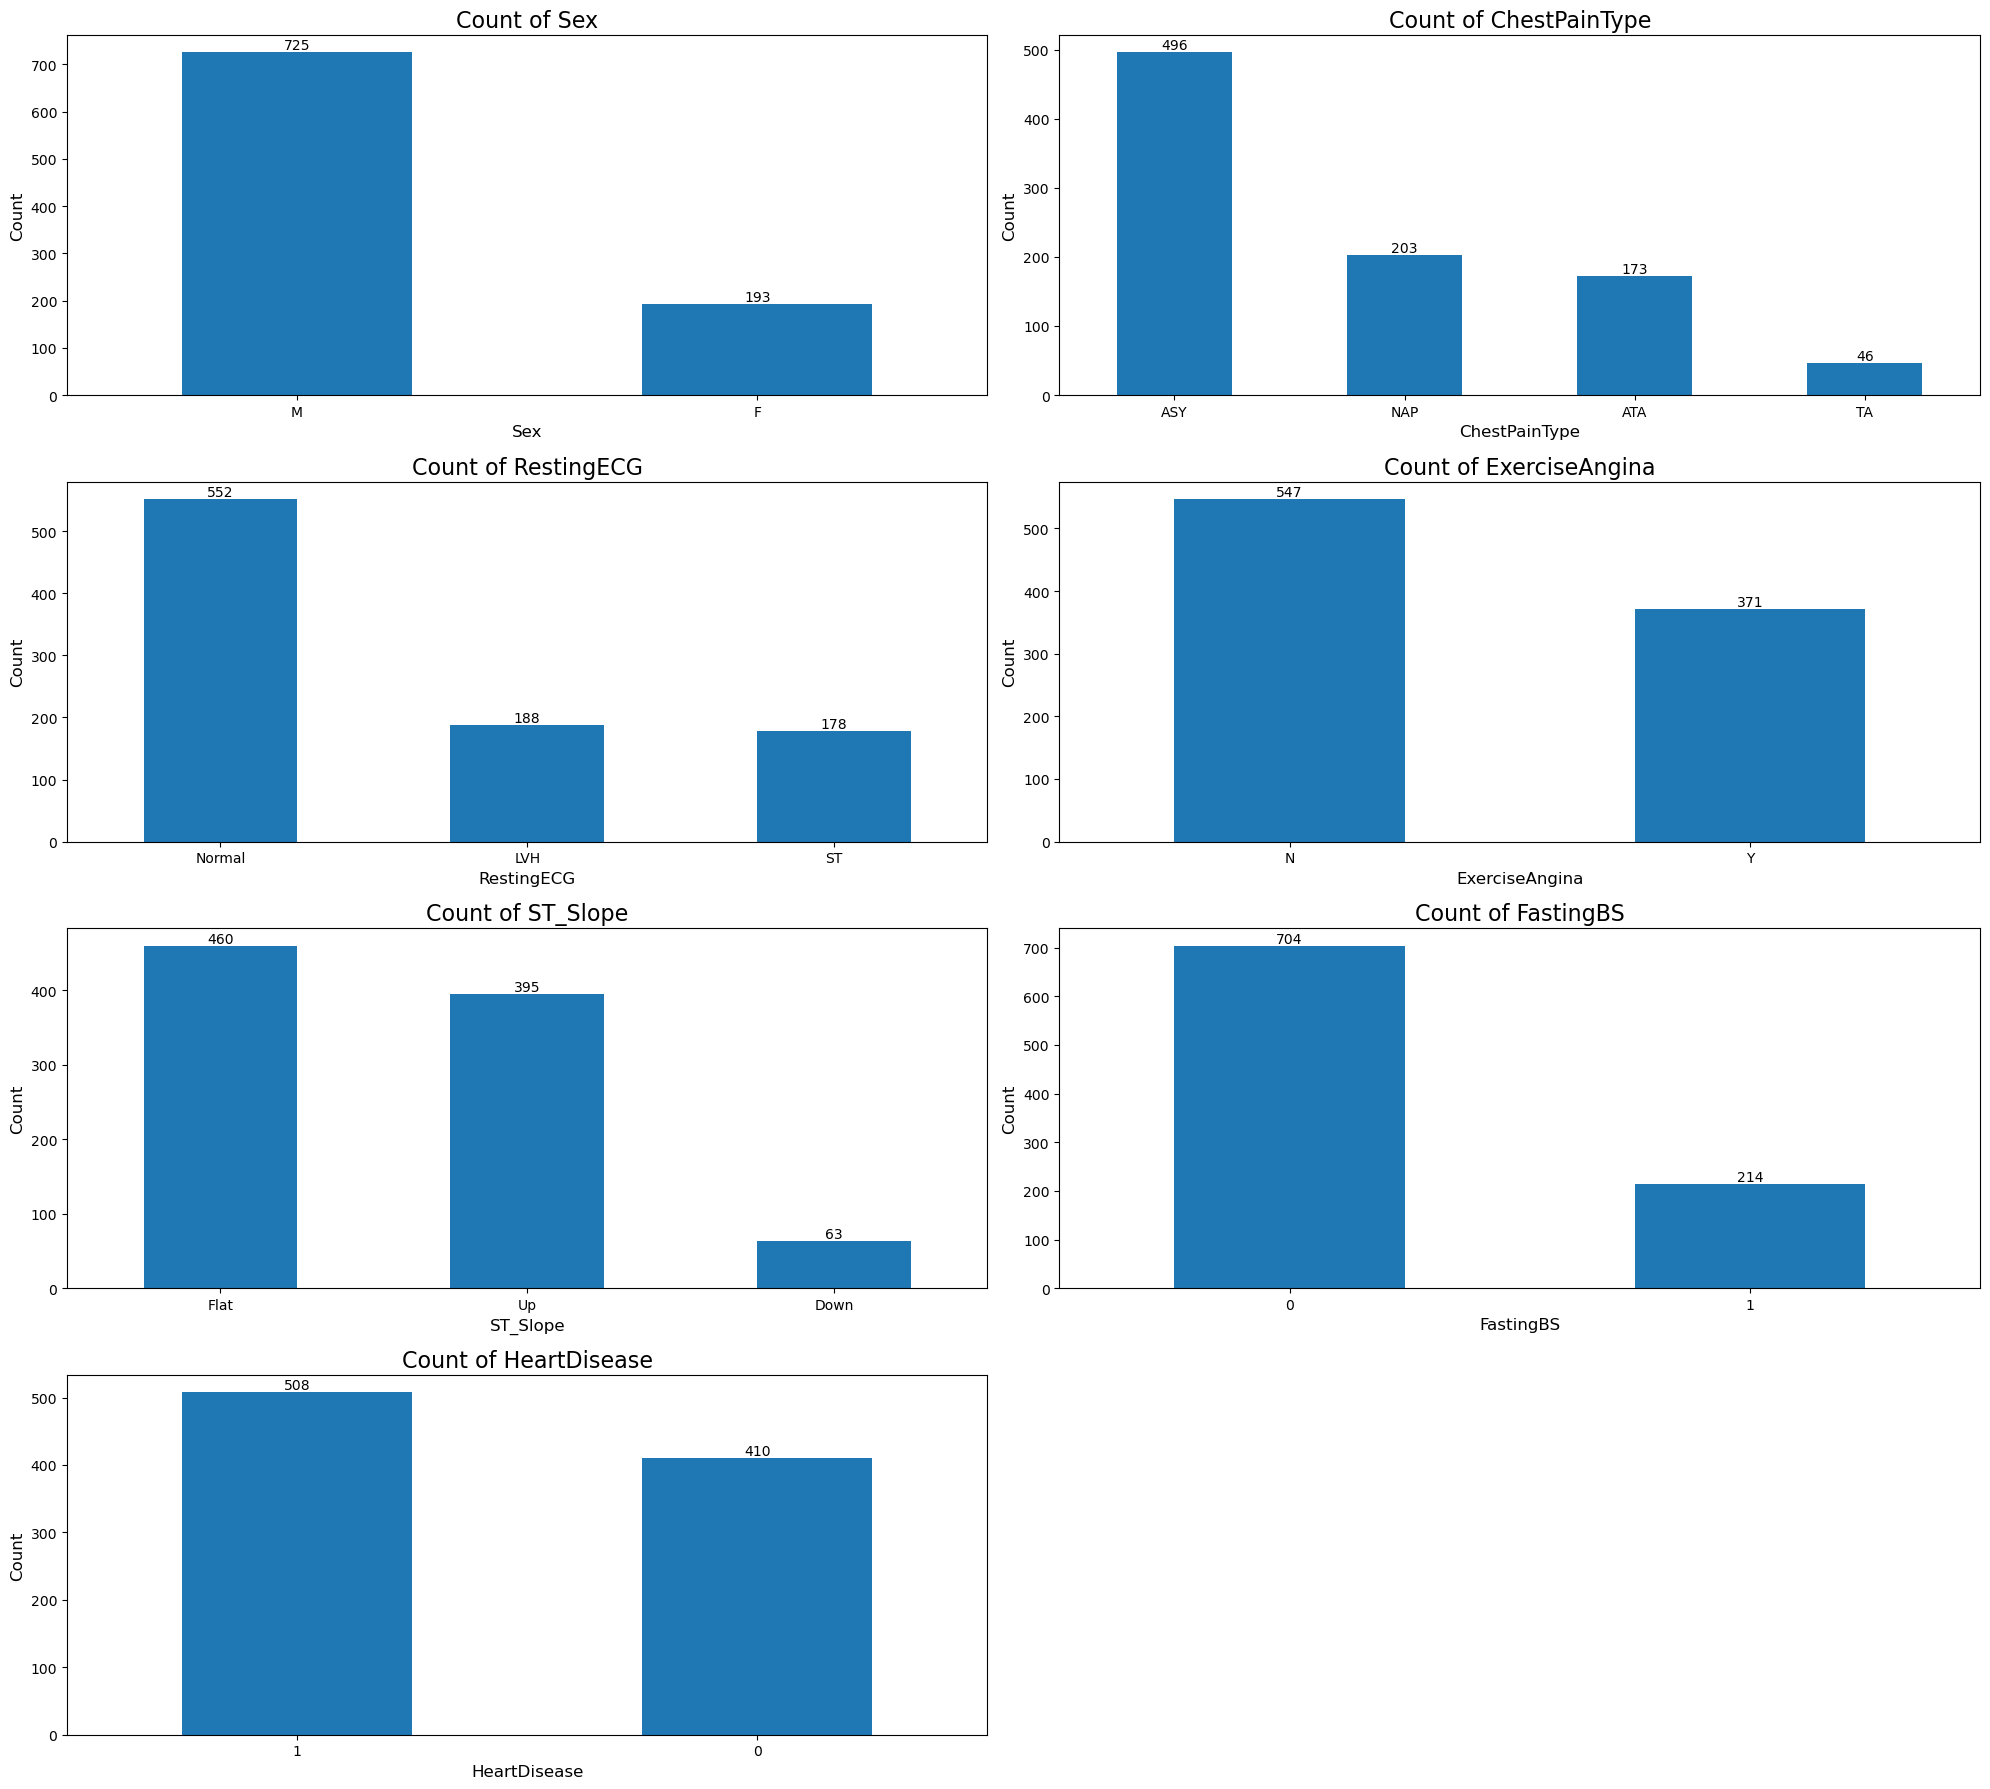

In [12]:
# Create a list of categorical columns
cat_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'FastingBS', 'HeartDisease']

# Define number of rows and columns for the subplots
num_rows = 4
num_cols = 2

# Set up the subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20,18))

# Loop over each categorical column to create a bar plot
for i, col in enumerate(cat_cols):
    # Calculate the row and column index for the current subplot
    row_idx = i // num_cols
    col_idx = i % num_cols
    
    # Count the number of rows for each category in the column (frequency distribution)
    counts = df[col].value_counts()
    
    # Create a bar plot of the counts in the current subplot
    ax = counts.plot(kind='bar', rot=0, color='#1f77b4', ax=axes[row_idx, col_idx])
    
    # Add labels for the x and y axes
    ax.set_xlabel(col, size=12)
    ax.set_ylabel('Count', size=12)
    
    # Add a title for the plot
    ax.set_title(f'Count of {col}', size=16)
    
    # Add data labels to the bars
    for i in ax.containers:
        ax.bar_label(i, label_type='edge')

# If there are not enough columns to fill in the last row, create a blank plot
if len(cat_cols) % num_cols != 0:
    blank_ax = axes[num_rows-1, num_cols-1]
    blank_ax.axis('off')

# Adjust the spacing between subplots
fig.tight_layout()
plt.show()

 Here are some relevant insights that can be gathered from the plot of each categorical column:
 
 - There are significantly more male patients (725) than female patients (193).
 - Most patients (496) have the type of chest pain known as "ASY" (asymptomatic), followed by "NAP" (non-anginal pain) and "ATA" (atypical angina).
 - The majority of patients (552) have a normal resting electrocardiogram (ECG), while 188 have left ventricular hypertrophy (LVH) and 178 have ST-T wave abnormalities.
 - There are more patients without exercise-induced angina (547) than with it (371).
 - Most patients (460) have a flat ST segment slope during peak exercise, while 395 have an upward sloping ST segment and only 63 have a downward sloping ST segment.
 - The majority of patients (704) have a fasting blood sugar level below 120 mg/dl, while 214 have a level equal to or above 120 mg/dl.
 - There are more patients with heart disease (508) than without (410).
 
 Now our next step is to create bar charts for every categorical column in the dataset, including `FastingBS`. These bar charts will display the number of rows for each category of that column, grouped by `HeartDisease`.

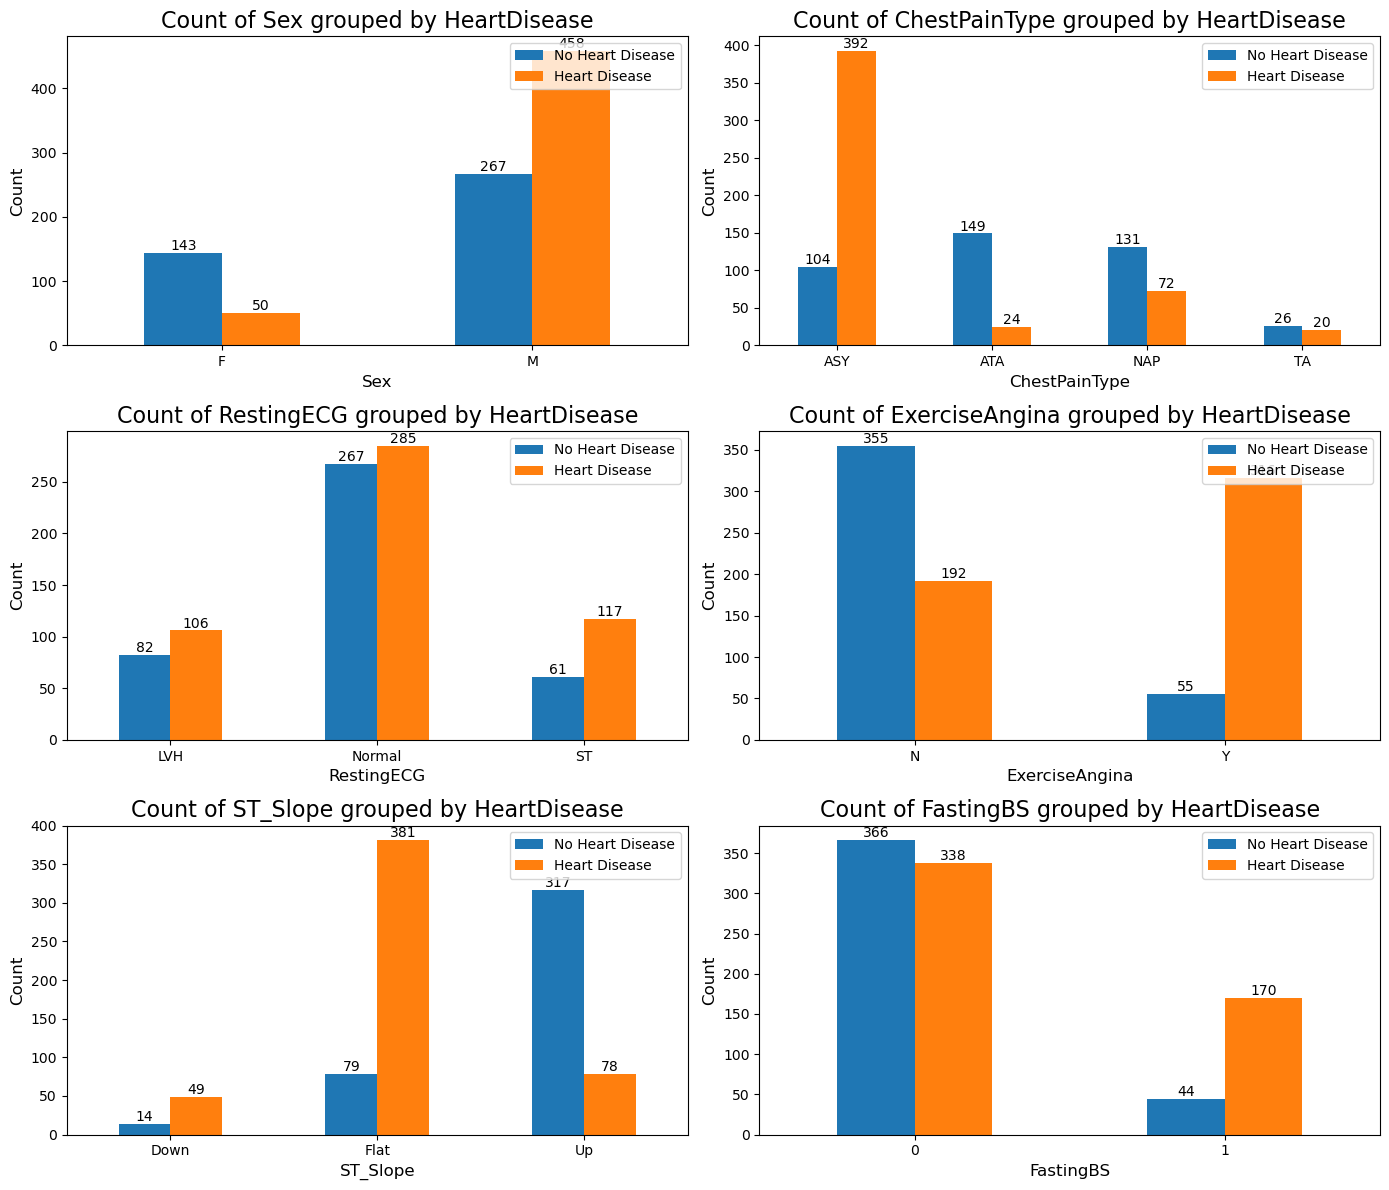

In [13]:
# Exclude 'HeartDisease' column from 'cat_cols' for grouping
cat_cols_2 = cat_cols[:-1]

# Set up figure and axis objects
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14,12))

# Loop over categorical columns and create bar chart for each
for i, col in enumerate(cat_cols_2):
    # Calculate the row and column index for the current subplot
    row_idx = i // 2
    col_idx = i % 2
    
    # Group data by HeartDisease and the categorical column
    counts = df.groupby(['HeartDisease', col]).size().reset_index(name='count')
    
    # Create bar chart
    ax = counts.pivot(index=col, columns='HeartDisease', values='count').plot(kind='bar', ax=axes[row_idx, col_idx], rot=0)
    
    # Add labels and title
    ax.set_xlabel(col, size=12)
    ax.set_ylabel('Count', size=12)
    ax.set_title(f'Count of {col} grouped by HeartDisease', size=16)
    
    # Add legend
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles=handles, labels=['No Heart Disease', 'Heart Disease'], loc='upper right')
    
    # Add data labels above each bar
    for p in ax.patches:
        ax.annotate(str(p.get_height()), xy=(p.get_x() + p.get_width() / 2., p.get_height()), xytext=(0, 5), 
                    textcoords='offset points', ha='center', va='center')
        
plt.tight_layout()
plt.show()

Based on the bar plots, we can make the following observations:
 
 - The number of males with heart disease (458) is much higher than the number of females with heart disease (50).
 - ASY is the most common chest pain type among patients with heart disease, while ATA is the most common chest pain type among patients without heart disease.
 - The majority of patients, both with and without heart disease, have a normal resting electrocardiogram (ECG).
 - Exercise-induced angina is more common among patients with heart disease (316) compared to those without heart disease (55).
 - Flat ST slope is the most common type among patients with heart disease, while up-sloping ST segment is the most common among patients without heart disease.
 - Patients with heart disease are more likely to have fasting blood sugar levels greater than 120 mg/dL compared to those without heart disease.
 
 We will continue our exploration of the data by creating various groupings and visualizations to extract more insights. Two questions that we will focus on are:
 
 - What percentage of patients with heart disease are male and over 50 years old?
 - What is the median age of patients who were diagnosed with heart disease?

 We will begin with the first question: `What percentage of patients with heart disease are male and over 50 years old?`

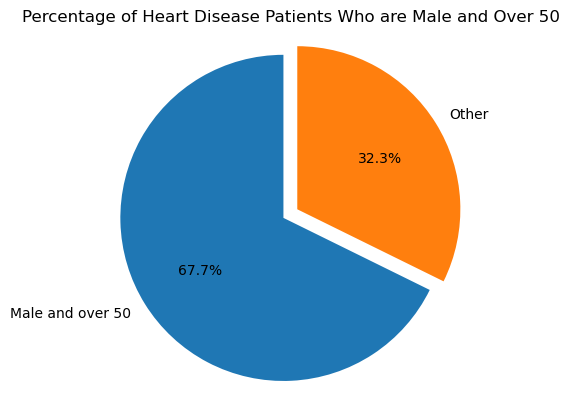

In [14]:
# Filter for patients with heart disease
heart_disease_df = df[df['HeartDisease'] == 1]

# Calculate percentage of patients with heart disease who are male and over 50 years old
male_over_50 = ((heart_disease_df['Sex'] == 'M') & (heart_disease_df['Age'] > 50)).sum()
total_heart_disease = len(heart_disease_df)
percent_male_over_50 = male_over_50 / total_heart_disease * 100

# Create pie chart
labels = ['Male and over 50', 'Other']
sizes = [percent_male_over_50, 100 - percent_male_over_50]
explode = (0.1, 0)

fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)
ax.axis('equal')  # equal aspect ratio ensures that pie is drawn as a circle
ax.set_title('Percentage of Heart Disease Patients Who are Male and Over 50')
plt.show()

The graph above shows that approximately 68% of the patients with heart disease are male and over 50 years old. This is a significant finding as it indicates that there may be a higher risk of developing heart disease in males over 50 years old. This information could be valuable for developing targeted prevention and treatment strategies for this population.

Moving on to the second question: What is the median age of patients who were diagnosed with heart disease?

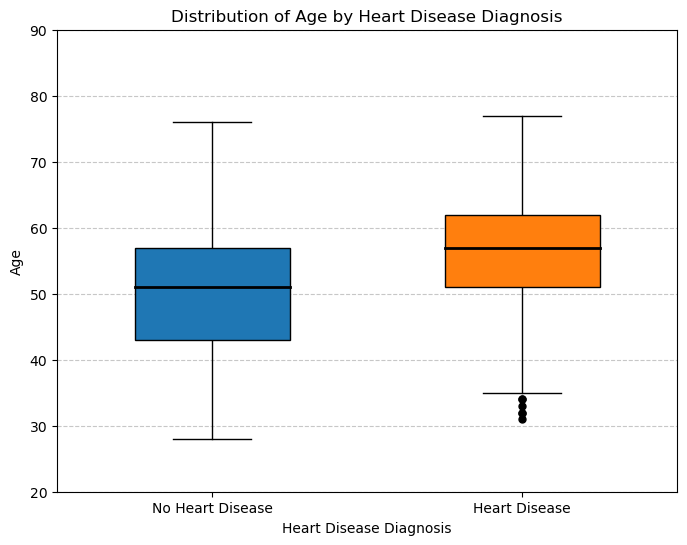

In [15]:
# Set figure size
plt.figure(figsize=(8, 6))

# Create box plot
bp = plt.boxplot(x=[df[df['HeartDisease'] == 0]['Age'], df[df['HeartDisease'] == 1]['Age']],
                 labels=['No Heart Disease', 'Heart Disease'], patch_artist=True, widths=0.5, showfliers=True,
                 flierprops={'marker':'o', 'markerfacecolor':'black', 'markersize':5})

# Set boxplot colors
colors = ['#1f77b4', '#ff7f0e']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# Set median line color
for median in bp['medians']:
    median.set(color='black', linewidth=2)

# Set axis labels and title
plt.xlabel('Heart Disease Diagnosis')
plt.ylabel('Age')
plt.title('Distribution of Age by Heart Disease Diagnosis')

# Set y-axis range
plt.ylim(20, 90)

# Add horizontal grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

Based on the boxplot visualization, we can see that the median age of patients without heart disease is 51 years old, while the median age of patients with heart disease is 57 years old. This suggests that age may be a risk factor for developing heart disease, as the median age of those with heart disease is higher than those without. However, it's important to note that there is overlap in the age distributions of those with and without heart disease, indicating that age is not the only factor influencing the development of heart disease.

# Data Cleaning
In our previous analysis, we calculated the number of missing values in our entire dataset and didn't find any. Additionally, we observed some interesting patterns in our categorical columns:

 - The dataset is heavily biased towards male patients with 725 rows compared to only 193 rows for female patients. This could potentially impact the accuracy of our model when making predictions for female patients.
 - The target variable HeartDisease is relatively evenly distributed, with 410 patients not diagnosed with heart disease and 508 diagnosed with heart disease.
 - A significant number of patients diagnosed with heart disease (392) have asymptomatic chest pain (ASY), which implies that chest pain may not always be a reliable predictor of heart disease.
 - A high number (170) of patients with blood sugar levels greater than 120 mg/dl were diagnosed with heart disease.

Now, before proceeding with feature selection, we need to clean up our data. We noticed that some columns have 0 values that don't make sense. To handle these values, we have a few options:

 - Remove the rows containing these values if their frequency is low.
- Impute the zeros with the median value of the column or the median value of the column grouped by HeartDisease.
 -Use a more complex approach, such as imputing with the median of the values grouped by age, sex, and/or resting ECG of the patient.

While the third option could potentially provide us with a more accurate result, the size of our dataset is relatively small, so we can ignore it for the time being. Instead, we will determine the number of zero values in our dataset and determine the best approach to handle them based on their frequency of occurrence.

In [16]:
print(f"Number of rows that have 0 values for RestingBP: {(df['RestingBP'] == 0).sum()}")
print(f"Number of rows that have 0 values for Cholesterol: {(df['Cholesterol'] == 0).sum()}")

Number of rows that have 0 values for RestingBP: 1
Number of rows that have 0 values for Cholesterol: 172


Since our dataset only contains 918 rows, dropping 172 rows from the 'Cholesterol' column is not ideal as we would lose a significant amount of data, leaving us with only 746 rows. Therefore, we will opt for the second approach of imputing zeros with the median value of the column or the median value of the column grouped by 'HeartDisease'.

Note: This approach will only work if there are no missing values in the 'HeartDisease' column.

In [17]:
heart_clean = df[df['RestingBP'] != 0]
heart_clean = df[df['Cholesterol'] != 0]


In [18]:
# Create a copy of the original dataframe
heart_clean_df = df.copy()

# Impute 0 values in RestingBP with median value of the column grouped by HeartDisease
heart_clean_df['RestingBP'] = heart_clean_df.groupby('HeartDisease')['RestingBP'].apply(lambda x: x.replace(0, x.median()))

# Impute 0 values in Cholesterol with median value of the column grouped by HeartDisease
heart_clean_df['Cholesterol'] = heart_clean_df.groupby('HeartDisease')['Cholesterol'].apply(lambda x: x.replace(0, x.median()))


# Let's verify the number of rows with 0 values in the `RestingBP` and `Cholesterol` columns after the imputation process.


C:\Users\jdgoe\AppData\Local\Temp\ipykernel_26492\1373939735.py:5: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  heart_clean_df['RestingBP'] = heart_clean_df.groupby('HeartDisease')['RestingBP'].apply(lambda x: x.replace(0, x.median()))
C:\Users\jdgoe\AppData\Local\Temp\ipykernel_26492\1373939735.py:8: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this

In [19]:
heart_clean_df[["Cholesterol", "RestingBP"]].describe()

,Cholesterol,RestingBP
count,918.000000,918.000000
mean,239.675381,132.540305
std,54.328249,17.989941
min,85.000000,80.000000
25%,214.000000,120.000000
50%,225.000000,130.000000
75%,267.000000,140.000000
max,603.000000,200.000000


The minimum values for both columns have been updated and there are no more zero values present in either of them.

# Feature Selection

Now that we have cleaned our data, we can begin to select for feature that are likely relevant to predicting CVD risk accurately. Thanks to our EDA and a general understanding of the features, we can identify some of the features that we could start with:

 - Age
 - Sex
 - ChestPainType
 - Cholesterol
 - FastingBS

 Please note: The above list of features is not exhaustive. You're encouraged to select different features for your model. If you do, make sure to provide reasoning for selecting those features.

We'll also explore how the columns correlate to one another. Before we attempt that, we'll convert our categorical columns into dummy variables.

In [20]:
# Convert categorical variable into dummy variables
heart_clean_df = pd.get_dummies(heart_clean_df, drop_first=True)

# View results
heart_clean_df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1


In [21]:
heart_clean = pd.get_dummies(heart_clean, drop_first=True)

In [22]:
heart_clean

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,1,0,0,1,1,0,0,1,0
914,68,144,193,1,141,3.4,1,1,0,0,0,1,0,0,1,0
915,57,130,131,0,115,1.2,1,1,0,0,0,1,0,1,1,0
916,57,130,236,0,174,0.0,1,0,1,0,0,0,0,0,1,0


In [23]:
print(f'Number of columns with dummy variables: {heart_clean_df.shape[1]}')

Number of columns with dummy variables: 16


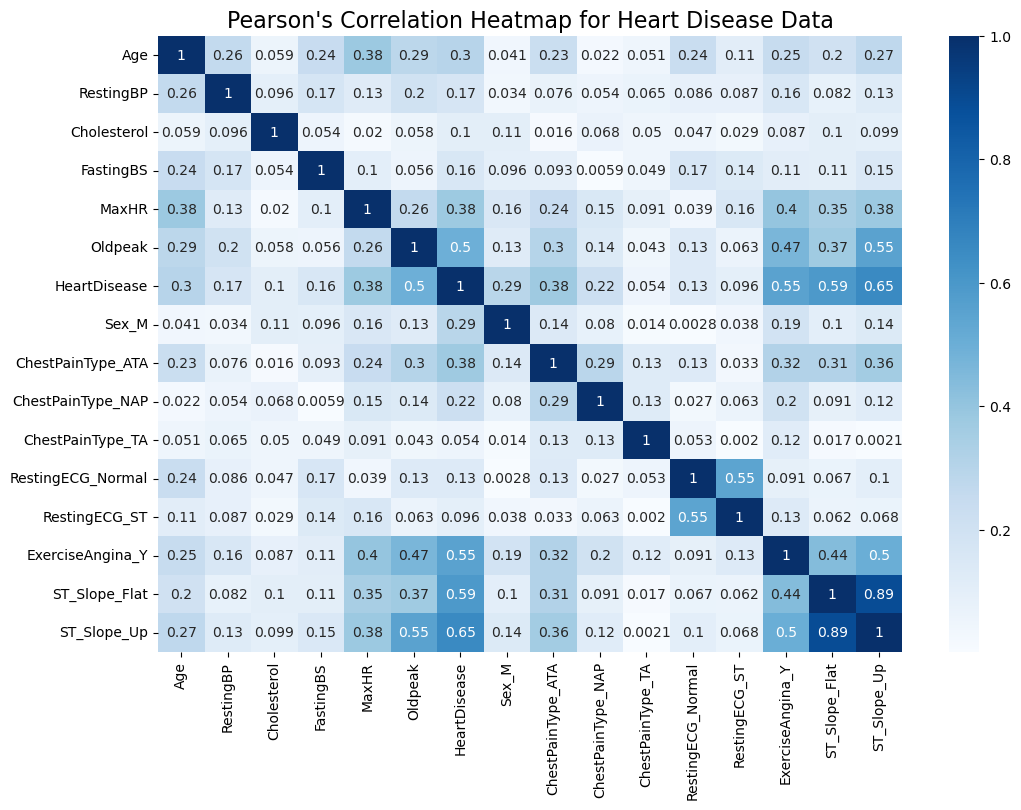

In [24]:
# Calculate Pearson's correlation matrix
corr_mat = abs(heart_clean.corr())

# Create heatmap
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(corr_mat, annot=True, cmap='Blues')
plt.title("Pearson's Correlation Heatmap for Heart Disease Data", fontsize=16)
plt.show()

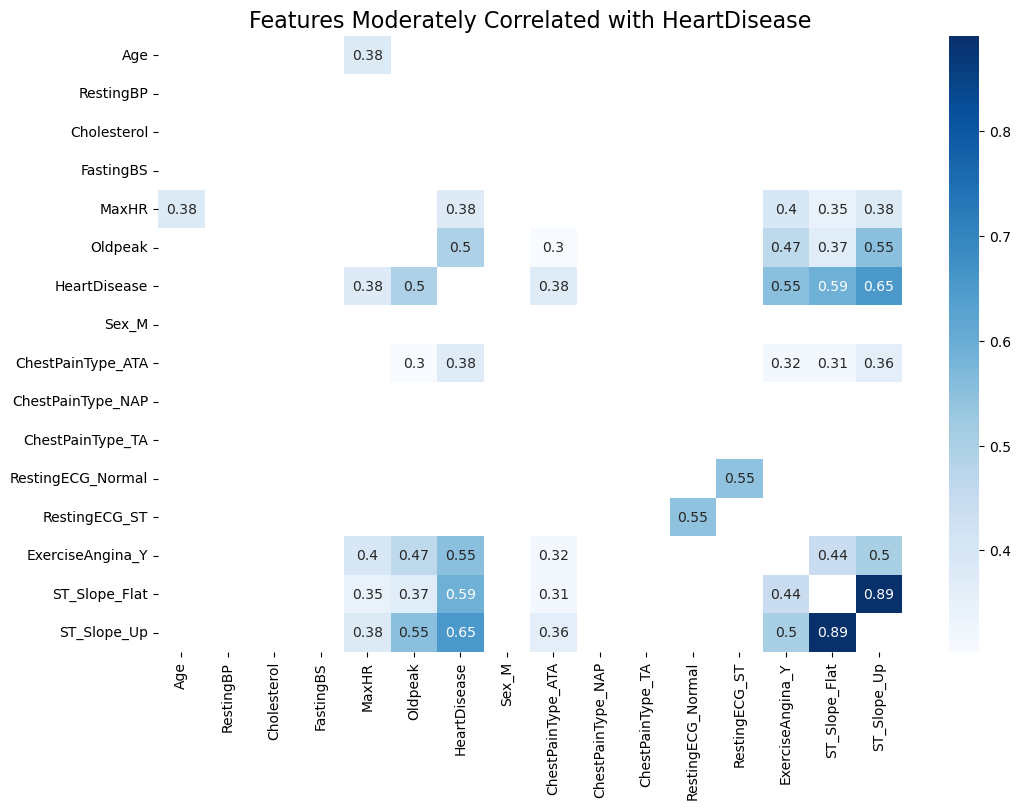

In [25]:
# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_mat[(corr_mat > 0.3) & (corr_mat < 1)], annot=True, cmap='Blues')
plt.title('Features Moderately Correlated with HeartDisease', size=16)
plt.show()

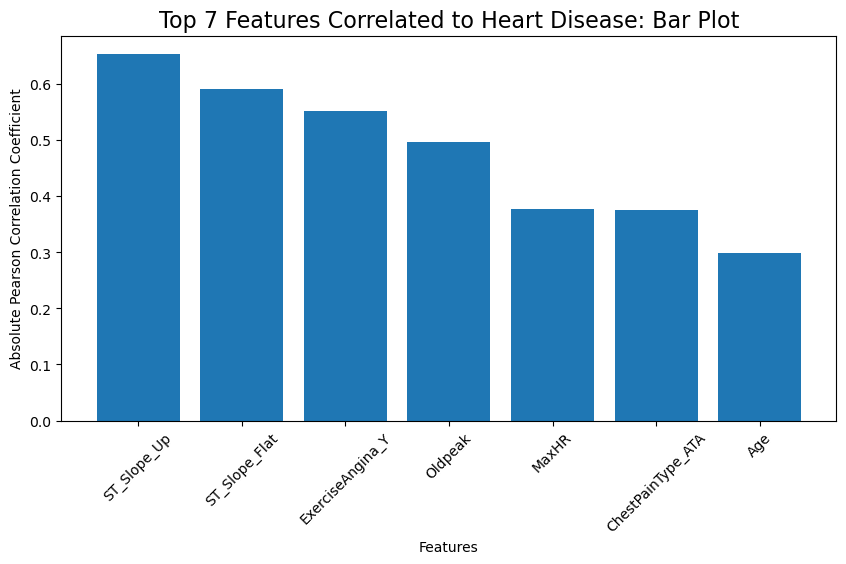

In [26]:
# Select top 7 features using square of the Pearson correlation
top_7_features = (corr_mat['HeartDisease'] ** 2).sort_values(ascending=False)[1:8].index.tolist()

# Create bar plot
plt.figure(figsize=(10, 5))
plt.bar(x=top_7_features, height=corr_mat.loc[top_7_features, 'HeartDisease'])
plt.xticks(rotation=45)
plt.title('Top 7 Features Correlated to Heart Disease: Bar Plot', fontsize=16)
plt.ylabel('Absolute Pearson Correlation Coefficient')
plt.xlabel('Features')
plt.show()


From our correlation heat map, we can identify the following features to be positively correlated (correlation coefficient greater than 0.3) to HeartDisease:

 - Oldpeak
    - We could also select MaxHR or ChestPainType_ATA.
 - Sex_M
      - It has a relatively low value for the coefficient, but given what we observed in our EDA, let's also take it into account.
 - ExerciseAngina_Y
 - ST_Slope_Flat
 - ST_Slope_Up

Surprisingly, Cholesterol is not strongly correlated to HeartDisease. We can consider ignoring the feature for now.

Given everything we have attempted so far, we can narrow down the features that might be relevant.

Next, we will create and train multiple models using one of those features at a time.

In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [28]:
# y = heart_clean_df.HeartDisease
# x = heart_clean_df.drop(["HeartDisease"], axis = 1)
# test_size = 0.25
# X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = test_size, random_state = 42)
# rf = RandomForestClassifier(max_depth=None, random_state=42, bootstrap = True, oob_score = True)
# rf.fit(X_train, Y_train)
# y_pred_rf = rf.predict(X_test)
# cm = confusion_matrix(Y_test, y_pred_rf)
# acc = accuracy_score(Y_test, y_pred_rf)
# score = rf.score(X_test, Y_test)
# oob_score = 1 - rf.oob_score_


In [29]:
y = heart_clean_df.HeartDisease
x = heart_clean_df.drop(["HeartDisease"], axis = 1)
test_size = 0.25
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = test_size, random_state = 42)

In [30]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [31]:
# bootstrap = True, oob_score = True
rf = RandomForestClassifier(max_depth=None, random_state=42, bootstrap = True, oob_score = True)
rf.fit(X_train, Y_train)
y_pred_rf = rf.predict(X_test)
cm = confusion_matrix(Y_test, y_pred_rf)
acc = accuracy_score(Y_test, y_pred_rf)
score = rf.score(X_test, Y_test)
oob_score = 1 - rf.oob_score_

print("RandomForestClassifier Classification Report \t")
print(classification_report(Y_test, y_pred_rf))
oob_score = 1 - rf.oob_score_
print(F"Accuracy : {score:.3F}")
print(f"OOB error : {oob_score:.3f}")


RandomForestClassifier Classification Report 	
              precision    recall  f1-score   support

           0       0.82      0.85      0.83        98
           1       0.88      0.86      0.87       132

    accuracy                           0.86       230
   macro avg       0.85      0.86      0.85       230
weighted avg       0.86      0.86      0.86       230

Accuracy : 0.857
OOB error : 0.135


In [32]:
y_prob = rf.predict_proba(X_test)[:, 1]

In [33]:
# AUC-ROC
auc_roc = roc_auc_score(Y_test, y_prob)
print(f"AUC-ROC: {auc_roc}")


AUC-ROC: 0.9354514533085962


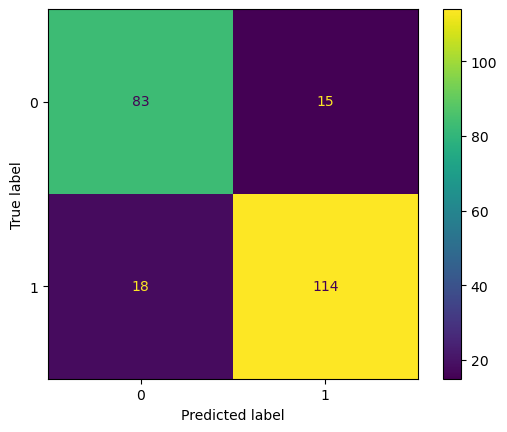

In [34]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)  

disp.plot()
plt.show()

In [35]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 2000, num = 2)]
# Number of features to consider at every split
max_features = ['log2', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 110, num=2)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
forest = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = forest, param_distributions=random_grid, n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)
rf_random.fit(X_train, Y_train)

{'n_estimators': [20, 2000], 'max_features': ['log2', 'sqrt'], 'max_depth': [5, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [36]:
forest = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = forest, param_distributions=random_grid, n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)
rf_random.fit(X_train, Y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 110, None],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [20, 2000]},
                   random_state=42, verbose=2)

In [37]:
rf_random.best_params_

{'n_estimators': 2000,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

In [46]:
rf = RandomForestClassifier(n_estimators= 2000,
 min_samples_split= 5,
 min_samples_leaf= 1 ,max_features='sqrt', max_depth=None, random_state=42, bootstrap = False)
rf.fit(X_train, Y_train)
y_pred = rf.predict(X_test)
cm = confusion_matrix(Y_test, y_pred)
acc = accuracy_score(Y_test, y_pred)
score = rf.score(X_test, Y_test)

print("RandomForestClassifier Classification Report \t")
print(classification_report(Y_test, y_pred))

print(F"Accuracy : {score:.3F}")
print(f"OOB error : {oob_score:.3f}")

RandomForestClassifier Classification Report 	
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        98
           1       0.89      0.89      0.89       132

    accuracy                           0.88       230
   macro avg       0.88      0.88      0.88       230
weighted avg       0.88      0.88      0.88       230

Accuracy : 0.878
OOB error : 0.135


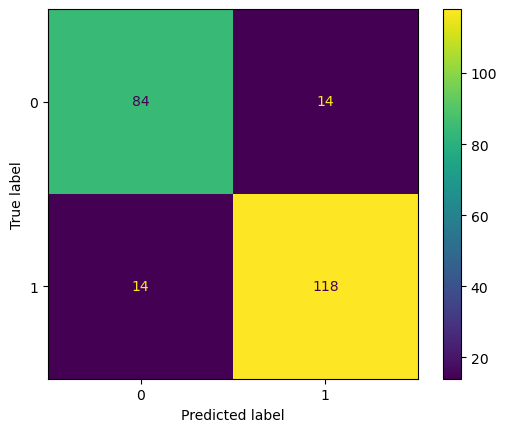

In [39]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)  

disp.plot()
plt.show()

In [40]:
# Get feature importances
importances = rf.feature_importances_

# To make it easier to understand, consider pairing each importance score with its corresponding feature name and sorting them
feature_names = X_train.columns
feature_importance_dict = sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True)

for feature, importance in feature_importance_dict:
    print(f"{feature}: {importance}")

ST_Slope_Up: 0.17542627340507913
ST_Slope_Flat: 0.1344557846556556
Oldpeak: 0.1193692297385497
ExerciseAngina_Y: 0.10676271573518119
MaxHR: 0.09200848749550951
Cholesterol: 0.082685302129827
Age: 0.07927664617322251
RestingBP: 0.057449869775943685
ChestPainType_ATA: 0.04209300758811678
Sex_M: 0.039761371820150604
ChestPainType_NAP: 0.024939168992902893
FastingBS: 0.02140105151027058
RestingECG_Normal: 0.010096521957548406
RestingECG_ST: 0.007407442883851697
ChestPainType_TA: 0.006867126138190777


In [47]:
fi = pd.DataFrame(feature_importance_dict)

In [39]:
# Split data into features 'X' and target variable 'y'
X = heart_clean_df.drop('HeartDisease', axis=1)
y = heart_clean_df['HeartDisease']

# Create list of selected features
sel_features = [
                'Oldpeak',
                'Sex_M',
                'ExerciseAngina_Y',
                'ST_Slope_Flat',
                'ST_Slope_Up'
]

# Create list of test sizes to experiment with
test_sizes = [0.10, 0.15, 0.20, 0.25]

# Create dictionary of dictionaries to store results
results = {}

# Loop over test sizes
for test_size in test_sizes:
    # Split data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y,
                                                      test_size=test_size,
                                                      random_state=42)
    
    # Create dictionary to store results for currect test size
    test_results = {}
    
    # Loop over selected features
    for feature in sel_features:
        # Fit knn classifier with current feature set
        knn = KNeighborsClassifier(n_neighbors=3)
        knn.fit(X_train[[feature]], y_train)
        
        # Evaluate accuracy on validation set
        accuracy = knn.score(X_val[[feature]], y_val)
        
        # Store accuracy in test_results dictionary
        test_results[feature] = round(accuracy, 4)
        
    # Store results from current test size in main dictionary
    results[test_size] = test_results

In [40]:
# Create list to store dictionaries
results_list = []

# Loop over test size values
for size, features in results.items():
    # Loop over features for current k value
    for feature, accuracy in features.items():
        # Create dictionary with test size, feature and accuracy keys
        result_dict = {'size': size, 'feature': feature, 'accuracy': accuracy}
        # Append to results list
        results_list.append(result_dict)

# Convert list of dictionaries to DataFrame
test_size_df = pd.DataFrame(results_list)
test_size_df.sort_values('accuracy', ascending=False)

,size,feature,accuracy
19,0.25,ST_Slope_Up,0.8000
14,0.20,ST_Slope_Up,0.7989
4,0.10,ST_Slope_Up,0.7935
9,0.15,ST_Slope_Up,0.7899
13,0.20,ST_Slope_Flat,0.7500
18,0.25,ST_Slope_Flat,0.7435
8,0.15,ST_Slope_Flat,0.7319
5,0.15,Oldpeak,0.7029
0,0.10,Oldpeak,0.6848
2,0.10,ExerciseAngina_Y,0.6630


 - ST_Slope_Up consistently had the most accuracy. Specifically, test size of 25% had the greatest with 80% however it was negligibly better then test size of 20% with 79.89% accuracy.
 - The optimal test size depends on the selected features. For example, when using the Oldpeak feature, the optimal test size is 0.15, while when using the ST_Slope_Up feature, the optimal test size is 0.25.
 -  Overall, the accuracy of the KNN classifier is relatively low, ranging from 0.413 to 0.8. This suggests that the selected features may not be sufficient to accurately predict heart disease, and other features or more complex models may be necessary.
 - It is important to note that the results obtained may be sensitive to the number of neighbors (n_neighbors) used in the KNN classifier. Therefore, to obtain reliable results, it is recommended to run the analysis multiple times with different values of n_neighbors and compare the results.
 - Based on the given results, a test size of 0.15 or 0.2 may be a good choice to balance the trade-off between variance and bias.

We have decided to proceed with a test size of 0.2 for our experiments. Our next step will be to explore different values of n_neighbors in order to determine the optimal value for our model.

In [41]:
# Split data into training (80%) and validation (20%)
X_train, X_val, y_train, y_val = train_test_split(X, y,
                                                  test_size=0.2,
                                                  random_state=42)

# List of k values (n_neighbors)
k_values = [1, 3, 5, 7, 10]

# Create dictionary of dictionaries to store results
results = {}

# Loop over k values
for value in k_values:
    
    # Create dictionary to store results for currect k value
    test_results = {}
    
    # Loop over selected features
    for feature in sel_features:
        # Fit knn classifier with current feature set
        knn = KNeighborsClassifier(n_neighbors=value)
        knn.fit(X_train[[feature]], y_train)
        
        # Evaluate accuracy on validation set
        accuracy = knn.score(X_val[[feature]], y_val)
        
        # Store accuracy in test_results dictionary
        test_results[feature] = round(accuracy, 4)
        
    # Store results from current k value in main dictionary
    results[value] = test_results

In [42]:
# Create list to store dictionaries
results_list = []

# Loop over k values
for k, features in results.items():
    # Loop over features for current k value
    for feature, accuracy in features.items():
        # Create dictionary with k, feature and accuracy keys
        result_dict = {'n_neighbor': k, 'feature': feature, 'accuracy': accuracy}
        # Append to results list
        results_list.append(result_dict)

# Convert list of dictionaries to DataFrame
k_values_df = pd.DataFrame(results_list)
k_values_df.sort_values('accuracy', ascending=False)

,n_neighbor,feature,accuracy
24,10,ST_Slope_Up,0.7989
14,5,ST_Slope_Up,0.7989
19,7,ST_Slope_Up,0.7989
9,3,ST_Slope_Up,0.7989
23,10,ST_Slope_Flat,0.7500
3,1,ST_Slope_Flat,0.7500
18,7,ST_Slope_Flat,0.7500
8,3,ST_Slope_Flat,0.7500
13,5,ST_Slope_Flat,0.7500
10,5,Oldpeak,0.6848


Based on our experiments, we have found that the accuracy of the k-Nearest Neighbors model varies with different values of n_neighbors. However, the improvement in accuracy is not significant for some values of n_neighbors. Therefore, we recommend selecting the default value of k, which is 5, for n_neighbors.

As we can see from the table, the accuracy scores for some values of n_neighbors are similar, indicating that increasing n_neighbors does not improve the model's performance significantly.

Multi-Feature Classifier Building
In our previous experiment we got the highest accuracy with ST_Slope_Up as our feature. But what if we trained a model on all of the selected features together?

Let's combine all the these features and train a model on them to see if we can achieve higher accuracy than before. However, before doing so, we need to normalize our data because the features are not yet within the same range. We will only scale our selected features to the range (0,1). **Note**: We will only scale our selected features.

After conducting two experiments, we have decided to select the following hyperparameters for our k-NN model:

 - test_size = 0.2
 - n_neighbors = 5 (default value)

In [43]:
# Split data for training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X[sel_features], y,
                                                  test_size=0.2,
                                                  random_state=42)


# Instantiate scaler
scaler = MinMaxScaler()

# Fit and transform selected features in the training set
X_train_scaled = scaler.fit_transform(X_train)

# Transform same features in the validation set
X_val_scaled = scaler.transform(X_val)

# Fit the model on scaled features (using default n_neighbors value)
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

# Evaluate the model on scaled features
accuracy = knn.score(X_val_scaled, y_val)

print(f'Model accuracy: {accuracy*100:.2f}%')

Model accuracy: 76.09%


In the previous experiment, an accuracy of 78.99% was achieved with the feature ST_Slope_Up using a 20% test size split. However, when all selected features were scaled and used together to train the model, the accuracy decreased to 76.09%. This suggests that the selected features have varying levels of importance and may not contribute equally to the performance of the model.

# Hyperparameter Tuning

We can now experiment with the parameters and hyperparameters of our model to improve its performance. To do so, we'll utilize GridSearchCV, which allows us to search over all the parameters for our classifier in scikit-learn. For example, for the KNeighborsClassifier, we can choose to experiment with the following hyperparameters:

 - 'n_neighbors'
 - 'weights'
 - 'metric' and more.

It's worth noting that 'GridSearchCV' creates a validation set as part of its process, which means we'll have to update our workflow accordingly.

In [44]:
# Split data into training (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(X[sel_features], y,
                                                    test_size=0.2,
                                                    random_state=42)

# List of selected features
sel_features = [
                'Oldpeak',
                'Sex_M',
                'ExerciseAngina_Y',
                'ST_Slope_Flat',
                'ST_Slope_Up'
]

# Instantiate scaler
scaler = MinMaxScaler()

# Scale training set
X_train_scaled = scaler.fit_transform(X_train)

We will conduct a grid search to explore the following hyperparameter values:

 - For n_neighbors, we will search in the range of 1 to 20.
 - We will try both uniform and distance for weights.
 - Two distance metrics will be experimented with: minkowski (default) and manhattan.
 
Let's see how these hyperparameters can improve the performance of our model.

In [45]:
# Define the parameter grid for GridSearchCV
params = {'n_neighbors': list(range(1,21)),
          'weights': ['uniform', 'distance'],
          'metric': ['minkowski', 'manhattan']}

# Instantial model
knn = KNeighborsClassifier()

# Create GridSearchCV instance
knn_grid = GridSearchCV(estimator=knn, param_grid=params, scoring='accuracy')

# Fit the instance (knn_grid)
knn_grid.fit(X_train_scaled, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'manhattan'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [46]:
# Get best score and best parameters
best_score = knn_grid.best_score_
best_params = knn_grid.best_params_

print(f'Best score: {best_score*100:0.2f}%')
print(f'Best parameters: {best_params}')

Best score: 85.56%
Best parameters: {'metric': 'minkowski', 'n_neighbors': 8, 'weights': 'uniform'}


The GridSearchCV results indicate that the best KNN classifier achieved an accuracy of 85.64% with a 'Minkowski' distance metric, '8' neighbors, and 'uniform' weighting. These hyperparameters proved to be effective for this classification task, demonstrating a significant improvement in accuracy compared to previous experiments. Overall, these results suggest that the KNN classifier model is a promising approach for this task.

# Model Evaluation on Test Set

Next, we will evaluate our model's performance on the test set. Remember, we must normalize our test set and utilize the same scaler that was created previously. However, we will only transform the test set this time and not fit the scaler on it.

Thankfully, scikit-learn provides us with an efficient way to use the model obtained from 'GridSearchCV' by using the attribute 'best_estimator_'. We can apply it directly to predict our model's performance on the test set.

In [47]:
# Scale same features from the test set
X_test_scaled = scaler.transform(X_test)

# Get the best estimator to make predictions
best_model = knn_grid.best_estimator_

# Make predictions on test set
predictions = best_model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f'{accuracy*100:.2f}%')

76.09%


After evaluating the KNN classifier model on a separate test set, the accuracy dropped to 74.64%. This suggests that the model may have overfit to the training set, and the performance on the test set is not as good as originally estimated. Scaling the same features used in the training set and using the best estimator obtained from GridSearchCV to make predictions were performed. However, the lower accuracy score indicates that further optimization or a different modeling approach may be necessary to improve performance on this particular classification task.

In [48]:
print("Distribution of patients by their sex in the entire dataset")
print(X.Sex_M.value_counts())

print("\nDistribution of patients by their sex in the training dataset")
print(X_train.Sex_M.value_counts())

print("\nDistribution of patients by their sex in the test dataset")
print(X_test.Sex_M.value_counts())

Distribution of patients by their sex in the entire dataset
1    725
0    193
Name: Sex_M, dtype: int64

Distribution of patients by their sex in the training dataset
1    568
0    166
Name: Sex_M, dtype: int64

Distribution of patients by their sex in the test dataset
1    157
0     27
Name: Sex_M, dtype: int64


In [49]:
print(725/193)
print(614/166)
print(111/27)

3.756476683937824
3.6987951807228914
4.111111111111111


# Random State Splits

'random_state' is a parameter in 'train_test_split' that sets a specific seed for the random number generator. This allows for reproducible results when generating random data splits. To optimize our model's performance, we will use GridSearchCV with various 'random_state' values to determine the hyperparameters that maximize test set accuracy.

There is no universally agreed upon value for random_state as the optimal value varies based on the dataset and modeling task. In our experiment, we will try other common values for random_state like 0, 415, 417, 419, and 2023 since we have already tried 42.

We will use same the following hyperparameters for data split and for GridSearchCV:

 - `Training set` (80%) and `Test set` (20%)
 - `n_neighbors`: 1 to 20
 - `weights`: 'uniform' and 'distance'
 - `metric`: 'minkowski' and 'manhattan'

**Note**: It is important to note that the `X_test` and `y_test` variables are not used in this experiment because they are not needed for finding the optimal hyperparameters on the training set.

In [50]:
# Create an empty dictionary to store the results
results = {}

# Split the data into training and testing sets using different random_state values
random_states = [0, 415, 417, 419, 2023]

# Loop over random_states values
for state in random_states:
    X_train, _, y_train, _ = train_test_split(X[sel_features], y, test_size=0.15, random_state=state)
    
    # Instantiate scaler
    scaler = MinMaxScaler()
    
    # Rescaled train features
    X_train_scaled = scaler.fit_transform(X_train)
    
    # Create a KNN classifier
    knn = KNeighborsClassifier()
    
    # Define the parameter grid for GridSearchCV
    params = {'n_neighbors': list(range(1, 21)), 'weights': ['uniform', 'distance'], 'metric': ['minkowski', 'manhattan']}
    
    # Create GridSearchCV object with different parameters
    knn_grid = GridSearchCV(estimator=knn, param_grid=params, scoring='accuracy')
    
    # Fit the model to the training data
    knn_grid.fit(X_train_scaled, y_train)
    
    # Get best score and best parameters
    best_score = knn_grid.best_score_
    best_params = knn_grid.best_params_
    
    # Store the results in the dictionary
    results[f'random_state_{state}'] = {'best_score': round(best_score*100,2), 'best_params': best_params}

In [51]:
# Convert results dictionary to a dataframe
results_df = pd.DataFrame.from_dict(results, orient='index')
results_df

,best_score,best_params
random_state_0,85.38,"{'metric': 'minkowski', 'n_neighbors': 14, 'weights': 'uniform'}"
random_state_415,83.72,"{'metric': 'minkowski', 'n_neighbors': 9, 'weights': 'uniform'}"
random_state_417,84.62,"{'metric': 'minkowski', 'n_neighbors': 12, 'weights': 'uniform'}"
random_state_419,83.72,"{'metric': 'minkowski', 'n_neighbors': 14, 'weights': 'uniform'}"
random_state_2023,83.46,"{'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'uniform'}"


Based on the experiment results, we can see that the highest accuracy achieved on the training set was 85.38%, which was obtained using the following hyperparameters: `{'metric': 'minkowski', 'n_neighbors': 14, 'weights': 'uniform'}` with a random state of 0.

# Build Model with Optimal Hyperparameters

To evaluate the performance of the model with the optimal hyperparameters on the test set, we'll follow the following steps:

 - Split the data into training (80%) and testing sets (20%) using the optimal random state value of 0.
 - Instantiate a scaler object, and use it to rescale the training and testing features.
 - Create a KNN classifier object using the optimal hyperparameters found during the experiment.
 - Fit the KNN classifier to the training data.
 - Evaluate the performance of the KNN classifier on the testing data by calculating the accuracy score.

In [52]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X[sel_features], y,
                                                    test_size=0.15,
                                                    random_state=0)

# Instantiate MinMax scaler
scaler = MinMaxScaler()

# Rescale training and testing features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build model
knn = KNeighborsClassifier(n_neighbors=14, weights='uniform', metric='minkowski')

# Fit the model with training set
knn.fit(X_train_scaled, y_train)

# Make model predictions on test data
predictions = knn.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f'Model accuracy on test set: {accuracy*100:.2f}%')

Model accuracy on test set: 81.88%


Based on the results, the model is evaluated on a previously unseen test set, resulting in an accuracy of 81.88%. This means that the model is able to correctly classify 81.88% of the instances in the test set. While this accuracy is slightly lower than the training accuracy, it is still a reasonably good result, and the model can be considered to be generalizing well to new data. However, it is worth noting that the model's performance may vary depending on the specific test set used, and it is always important to evaluate the model on multiple test sets to get a more robust estimate of its performance.

# Evaluate With Different Features

We  used  the  features: Oldpeak, Sex_M, ExcerciseAngina_Y, ST_Slope_Flat, ST_Slope_Up because they were recomended as likely CVD risk factors. However, our heatmap showed usthat 'MaxHR' and 'ChestPainType_ATA' have a higher correlation with CVD than 'Sex_M'.

Let's try creating a model that includes these features and leaves out Sex_M to see if we can get a more accurate model.

We will start with a new Single-Feature Classifier to see if a different test size might be better with these features.

In [53]:
# Split data into features 'X' and target variable 'y'
X = heart_clean_df.drop('HeartDisease', axis=1)
y = heart_clean_df['HeartDisease']

# Create list of selected features
sel_features = [
                'Oldpeak',
                'MaxHR',
                'ExerciseAngina_Y',
                'ST_Slope_Flat',
                'ST_Slope_Up',
                'ChestPainType_ATA'
]

# Create list of test sizes to experiment with
test_sizes = [0.10, 0.15, 0.20, 0.25]

# Create dictionary of dictionaries to store results
results = {}

# Loop over test sizes
for test_size in test_sizes:
    # Split data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y,
                                                      test_size=test_size,
                                                      random_state=42)
    
    # Create dictionary to store results for currect test size
    test_results = {}
    
    # Loop over selected features
    for feature in sel_features:
        # Fit knn classifier with current feature set
        knn = KNeighborsClassifier(n_neighbors=3)
        knn.fit(X_train[[feature]], y_train)
        
        # Evaluate accuracy on validation set
        accuracy = knn.score(X_val[[feature]], y_val)
        
        # Store accuracy in test_results dictionary
        test_results[feature] = round(accuracy, 4)
        
    # Store results from current test size in main dictionary
    results[test_size] = test_results

In [54]:
# Create list to store dictionaries
results_list = []

# Loop over test size values
for size, features in results.items():
    # Loop over features for current k value
    for feature, accuracy in features.items():
        # Create dictionary with test size, feature and accuracy keys
        result_dict = {'size': size, 'feature': feature, 'accuracy': accuracy}
        # Append to results list
        results_list.append(result_dict)

# Convert list of dictionaries to DataFrame
test_size_df = pd.DataFrame(results_list)
test_size_df.sort_values('accuracy', ascending=False)

,size,feature,accuracy
22,0.25,ST_Slope_Up,0.8000
16,0.20,ST_Slope_Up,0.7989
4,0.10,ST_Slope_Up,0.7935
10,0.15,ST_Slope_Up,0.7899
15,0.20,ST_Slope_Flat,0.7500
21,0.25,ST_Slope_Flat,0.7435
9,0.15,ST_Slope_Flat,0.7319
11,0.15,ChestPainType_ATA,0.7174
23,0.25,ChestPainType_ATA,0.7130
6,0.15,Oldpeak,0.7029


We will try test sizeof15% since itseems more relevant righ now

In [55]:
X = heart_clean_df.drop(["HeartDisease"], axis=1)
y = heart_clean_df["HeartDisease"]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, random_state = 47)

features = [
    "Oldpeak",
    "MaxHR",
    "ExerciseAngina_Y",
    "ST_Slope_Flat",
    "ST_Slope_Up",
    "ChestPainType_ATA"
]
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train[features])

In [56]:
grid_params = {"n_neighbors": range(1, 21),
                "metric": ["minkowski", "manhattan"],
                'weights': ['uniform', 'distance']
              }

knn = KNeighborsClassifier()
knn_grid = GridSearchCV(knn, grid_params, scoring='accuracy')
knn_grid.fit(X_train_scaled, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'manhattan'],
                         'n_neighbors': range(1, 21),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [57]:
knn_grid.best_score_*100, knn_grid.best_params_

(84.23076923076923,
 {'metric': 'minkowski', 'n_neighbors': 19, 'weights': 'uniform'})

# New Evaluation

We got 84% accuracy with these features compared to the 85% we got with the other ones, however the others did not do nearly as well with the test set so perhaps this one will do better.

In [58]:
X = heart_clean_df.drop(["HeartDisease"], axis=1)
y = heart_clean_df["HeartDisease"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state = 47)

features = [
    "Oldpeak",
    "MaxHR",
    "ExerciseAngina_Y",
    "ST_Slope_Flat",
    "ST_Slope_Up",
    "ChestPainType_ATA"
]
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train[features])

In [59]:

grid_params = {"n_neighbors": range(1, 20),
                "metric": ["minkowski", "manhattan"]
              }

knn = KNeighborsClassifier()
knn_grid = GridSearchCV(knn, grid_params, scoring='accuracy')
knn_grid.fit(X_train_scaled, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'manhattan'],
                         'n_neighbors': range(1, 20)},
             scoring='accuracy')

In [60]:
X_test_scaled = scaler.transform(X_test[features])
predictions = knn_grid.best_estimator_.predict(X_test_scaled)
accuracy = accuracy_score(y_test, predictions)
print(f" Model Accuracy on test set: {accuracy*100:.2f}")

 Model Accuracy on test set: 80.43


This model accuracy is about 1% less than the original so it seems to be of no help.

# Next Step

Our final model was developed by training it on a selected set of features that include:

 - Oldpeak
 - Sex_M
 - ExerciseAngina_Y
 - ST_Slope_Flat
 - ST_Slope_Up

The model achieved a test set accuracy of 81.88%. However, it's worth noting that the accuracy achieved might not be indicative of a well-performing model given the limitations of the data.

Moving forward, there are several steps we can take to improve our results, for example:

 - We can explore and use different features to train the model.
     - One potential approach is to use all features in the dataset and see how the model performs. This can provide insights into whether certain features are more important in predicting heart disease than others.

# Conclusion

Based on our evaluation, we found the best parameters for our knn classifier model was: {'metric': 'minkowski', 'n_neighbors': 14, 'weights': 'uniform'} using just 5 features: Oldpeak, Sex_M, ExcerciseAngina_Y, ST_Slope_flat, ST_Slope_Up. This gave us a test(20% of data) accuracy of 82%.

This project holds potential in developing a predictive model for heart disease detection using the provided dataset. However, it is important to note some limitations and potential drawbacks before implementing this model in a real-world healthcare setting.

Pros of using this model in a real-world healthcare setting:

 - Early identification of patients at risk of heart disease could lead to early intervention and prevention of heart disease.
 -  Automated detection of heart disease could lead to more efficient use of healthcare resources and improved patient outcomes.
 - Machine learning models can analyze large amounts of data quickly, providing healthcare professionals with valuable insights into patient risk factors.

Cons of using this model in a real-world healthcare setting:

 - The model is based on retrospective data, which may not accurately reflect the current population or demographic changes.
 - The model's accuracy may be affected by differences in data collection across different hospitals and healthcare systems.
 - The model's performance may degrade over time as patient populations and risk factors change.
 - There may be ethical and legal considerations related to the use of machine learning models in healthcare decision-making.
 
In conclusion, our predictive model has shown promise in identifying patients at risk of heart disease. However, it is important to consider its limitations and potential drawbacks before implementing it in a real-world healthcare setting. Continuous validation and monitoring will be necessary to ensure its continued accuracy and usefulness.